<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/04_07_Interpolation_Extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cross Validation**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH04/CH04_SEC05_1_CrossValidate.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rcParams
rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8,8]

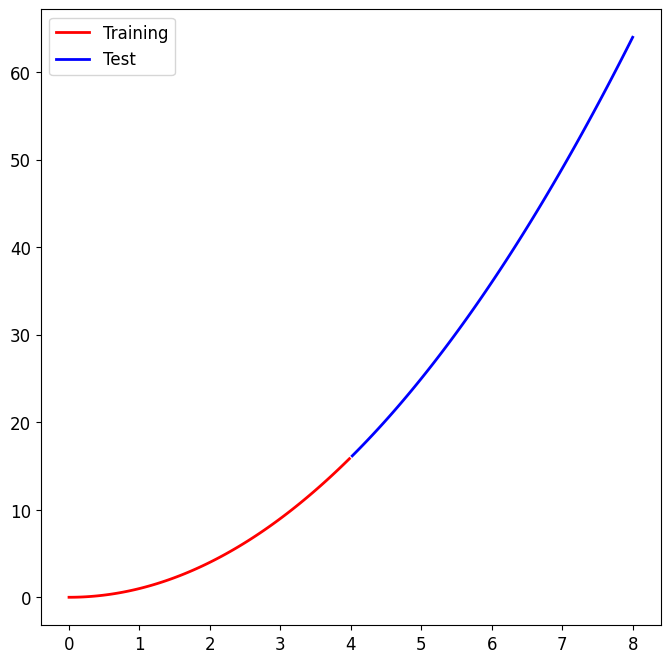

In [2]:
# Data

# Number of points
n = 200

# Length of Domain
L = 8
x = np.linspace(0,L,n)

# Training - The first 100 elements of the input
x1 = x[:100]

# Testing - The second 100 elements of the input
x2 = x[100:200]

# The length of training input data
n1 = len(x1)
# The length of testing input data
n2 = len(x2)

# Train -  parabola x = [0,4]
ftrain = np.power(x1,2)

# Test - parabola x = [4,8]
ftest = np.power(x2,2)

plt.plot(x1, ftrain, color='r', linewidth=2, label='Training')
plt.plot(x2, ftest,  color='b', linewidth=2, label='Test')

plt.legend()
plt.show()


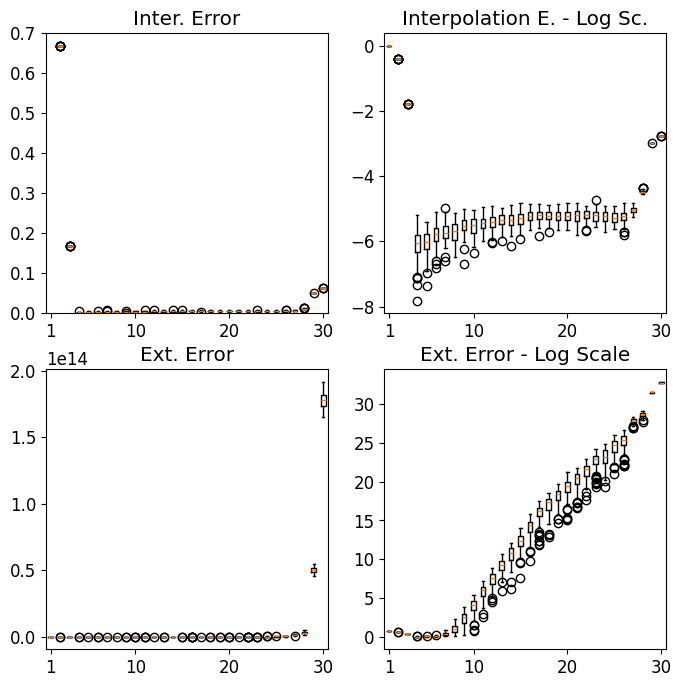

In [3]:
# Number of model terms
M = 30

# Initialize the training and test Error matrix
Eni = np.zeros((100,M))
Ene = np.zeros((100,M))

for jj in range(M):
    # Initialize the training and test data matrix
    phi_i = np.zeros((n1,jj+1))
    phi_e = np.zeros((n2,jj+1))

    for j in range(jj):
        # Training - interpolation key
        phi_i[:,j] = np.power(x1,j)
        # Testing - extrapolation key
        phi_e[:,j] = np.power(x2,j)

    # function, f(x) = x^2
    f = np.power(x,2)

    for j in range(100):

        # Adding noise to training data -  interpolation
        fni = np.power(x1,2) + 0.1*np.random.randn(n1)
        # Adding noise to test data -  extrapolation
        fne = np.power(x2,2) + 0.1*np.random.randn(n2)

        ########################################################################
        # The (Moore-Penrose) pseudo-inverse (pinv) of a training data matrix
        ani = np.linalg.pinv(phi_i) @ fni

        # approximate solution for the training data
        fnai = phi_i @ ani
        # Normalized L2-norm for the training data (the Euclidean norm or Frobenius norm)
        Eni[j,jj] = np.linalg.norm(ftrain-fnai,ord=2)/np.linalg.norm(ftrain,ord=2)

        # extrapolate using the loadings from training data
        fnae = phi_e @ ani
        # Normalized L2-norm for the test data
        Ene[j,jj] = np.linalg.norm(ftest-fnae,ord=2)/np.linalg.norm(ftest,ord=2)

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].set_title("Inter. Error")
axs[0].boxplot(Eni)
axs[0].set_ylim(0,0.7)

axs[1].set_title("Interpolation E. - Log Sc.")
axs[1].boxplot(np.log(Eni))
#axs[1].set_ylim(0,0.02)

axs[2].set_title("Ext. Error")
axs[2].boxplot(Ene)

axs[3].set_title("Ext. Error - Log Scale")
axs[3].boxplot(np.log(Ene+1))
#axs[3].set_ylim(0,30)

for ax in axs:
    ax.set_xticks((1,10,20,30))
    ax.set_xticklabels((1,10,20,30))

plt.show()